# Best Indicator for the Interest the Borrower has to pay
## by David Bohnhoff

## Investigation Overview

In this investigation I wanted to look for the best indicator available in the Prosper Database associated with the interest the Borrower has to pay.
## Dataset Overview

The data consisted of around 114,000 loans with over 80 variables for each loan. These variables include different ratings, income range, employment status and for example if hte borrower is a homeowner or not. 29,084 loans were removed from the database since they didn't include the rating I expected to be the best indicator.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/prosperLoanData.csv')

In [3]:
#Renaming ProsperRating (numeric) and ProsoperRating (Alpha)
df.rename(columns = {'ProsperRating (numeric)' : 'ProsperRating_numeric', 'ProsperRating (Alpha)' : 'ProsperRating_Alpha'}, inplace = True)

In [4]:
#dropping the loans that don't have a ProsperRating
df_clean = df.dropna(subset=['ProsperRating_Alpha'])

In [5]:
# convert ProsperRating_Alpha, EmploymentStatus and IncomeRange into ordered categorical types 
ordinal_var_dict = {'ProsperRating_Alpha': ['HR','E','D','C', 'B', 'A', 'AA'],
                   'EmploymentStatus': ['Not employed', 'Part-time', 'Other', 'Retired', 'Self-employed', 'Full-time', 'Employed'],
                   'IncomeRange':['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower APR

The distribution of the Borrower APR is nearly normal distributed but with a clear peak around 0.36.

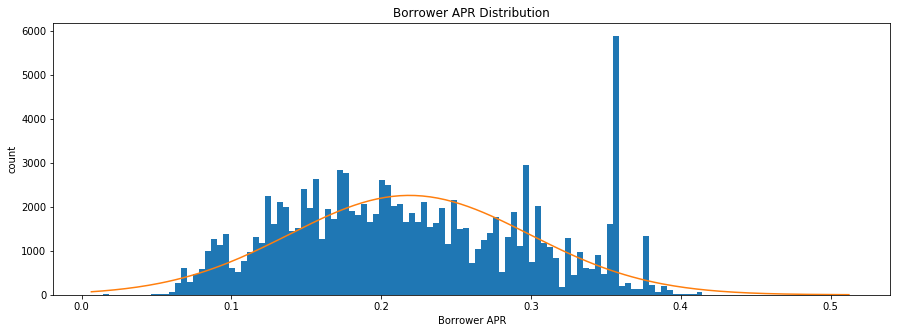

In [6]:
#creating a histogram for BorrowerAPR
plt.figure(figsize = [15, 5])
bins = np.arange(df.BorrowerAPR.min(), df.BorrowerAPR.max()+0.004, 0.004)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('count');

# overlay a theoretical normal distribution on top
samp_mean = df['BorrowerAPR'].mean()
samp_sd = df['BorrowerAPR'].std()

from scipy.stats import norm
x = np.linspace(df.BorrowerAPR.min(), df.BorrowerAPR.max(), 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df.shape[0] * 0.004 # scale the distribution height

plt.plot(x, y);

## Borrower APR vs. Loan Amount

There is a weak negative correlation between loan amount and BorrowerAPR. High BorrowerAPR is only found with smaller loans. While the high loan amounts are mainly in the second quartil of the BorrowerAPR (0.163 - 0.219).

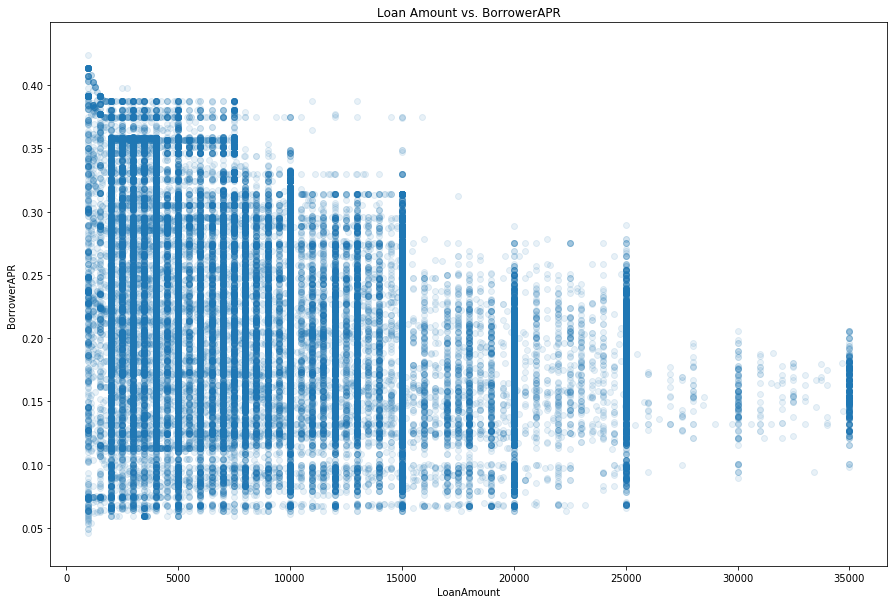

In [7]:
plt.figure(figsize = [15, 10])
sb.regplot(data = df_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws = {'alpha' : 0.1}, fit_reg = False)
plt.title('Loan Amount vs. BorrowerAPR')
plt.ylabel('BorrowerAPR')
plt.xlabel('LoanAmount');

## BorrowerAPR vs ProsperRating
There is a clear negative correlation between ProsperRating and BorrowerAPR. The bulk of the data per rating is each in a 0.05 range of the BorrowerAPR. There are lots of outliers though. For the lowest rating HR the BorrowerAPR is even more compressed around 0.36.


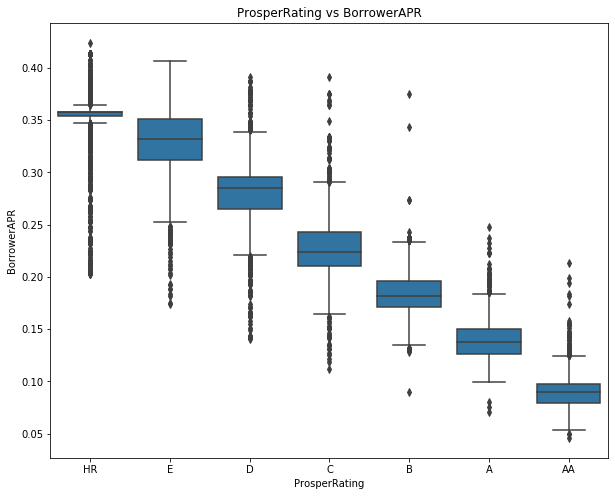

In [8]:
plt.figure(figsize = [10, 8])
color = sb.color_palette()[0]
sb.boxplot(data = df_clean, x = 'ProsperRating_Alpha', y = 'BorrowerAPR', color = color)
plt.title('ProsperRating vs BorrowerAPR')
plt.ylabel('BorrowerAPR')
plt.xlabel('ProsperRating');

## FacetGrid of Heatmaps over Loan Amount vs BorrowerAPR for the different ProsperRatings

Combination of the former plots. Each plot shows a heatmap for one of the ProsperRatings. The low ratings have high BorrowerAPR and low LoanAmount. The higher the rating goes the lower the BorrowerAPR becomes. Furthermore high loan Amounts (above 30k) are only available for PrsoperRatings B and better.

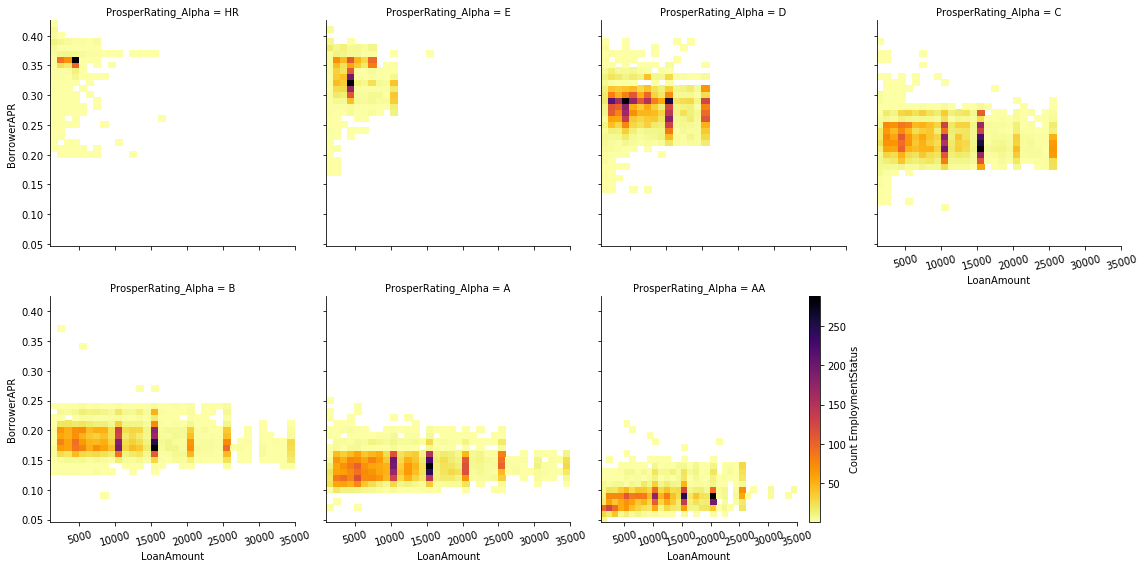

In [9]:
#Creating a function that creates heat maps with seaborn's PairGrid for LoanOriginalAmount over BorrowerAPR
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_y = np.arange(df_clean.BorrowerAPR.min(), df_clean.BorrowerAPR.max()+0.01, 0.01)
    bins_x = np.arange(df_clean.LoanOriginalAmount.min(), df_clean.LoanOriginalAmount.max()+1000, 1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(rotation = 15)
    
# create faceted heat maps on Homeowner
g = sb.FacetGrid(data = df_clean, col = 'ProsperRating_Alpha', col_wrap = 4, height = 4)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('LoanAmount')
g.set_ylabels('BorrowerAPR')
plt.colorbar(label = 'Count EmploymentStatus')

plt.show();

## Conclusion

The best indicator for the BorrowerAPR is the ProsperRating. This is clearly visible in the different plots.

code to run the slideshow via CMD:

jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle